<a href="https://colab.research.google.com/github/kechii/gosshit/blob/main/researchmethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import io
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['test1.csv']))

Saving test1.csv to test1.csv


In [13]:
print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198 

In [14]:
print("\n--- df.head() ---")
print(df.head())

print("\n--- df.info() ---")
df.info()

print("\n--- df.describe() (Numerical columns) ---")
print(df.describe())


--- df.head() ---
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               T


--- Starting Data Cleaning and Feature Engineering ---

'Item_Fat_Content' standardized. Unique values now:
['Low Fat' 'Regular' 'low fat']

Missing 'Item_Weight' imputed with mean: 12.70
Missing 'Outlet_Size' imputed with mode: 'Medium'

'Outlet_Age' created based on current year 2025.

--- Verifying missing values after imputation ---
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Age                   0
dtype: int64

--- Analyzing Categorical Variable Distributions (Value Counts) ---

'Item_Fat_Content' distribution:
Item_Fat_Content
Low Fat    3602
Regular    2013
low fat      66
Name: count, dtype: int64

'Item_Type' distribution:
Item_Type
Snack Foods              789
Fruits and Vege

/tmp/ipython-input-2235045381.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(item_weight_mean, inplace=True)
/tmp/ipython-input-2235045381.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

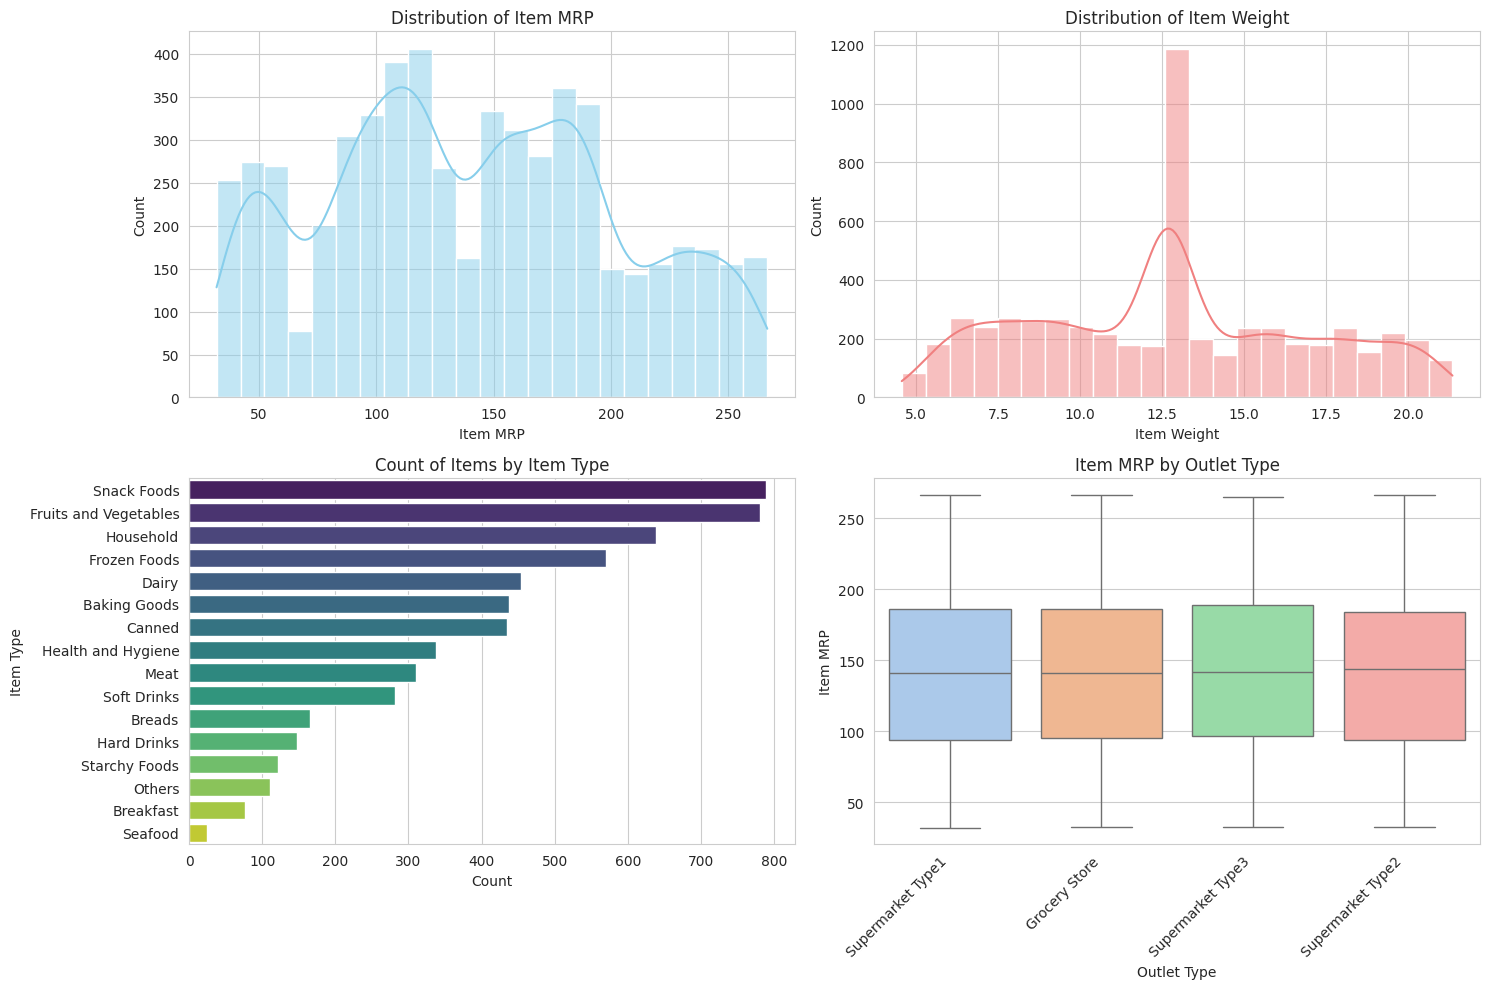

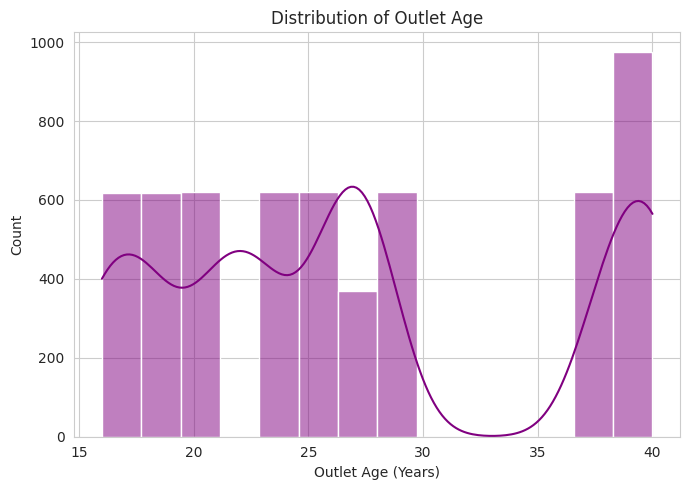

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already loaded from your previous step.
# If you restarted your kernel, make sure to run:
# df = pd.read_csv('Test_u94Q5KV.csv')

print("\n--- Starting Data Cleaning and Feature Engineering ---")

# 1. Standardize 'Item_Fat_Content'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular'})
print("\n'Item_Fat_Content' standardized. Unique values now:")
print(df['Item_Fat_Content'].unique())

# 2. Impute missing 'Item_Weight' with the mean
item_weight_mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(item_weight_mean, inplace=True)
print(f"\nMissing 'Item_Weight' imputed with mean: {item_weight_mean:.2f}")

# 3. Impute missing 'Outlet_Size' with the mode
# Find the mode, ensuring it handles multiple modes gracefully by picking the first
outlet_size_mode = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(outlet_size_mode, inplace=True)
print(f"Missing 'Outlet_Size' imputed with mode: '{outlet_size_mode}'")

# 4. Feature Engineering: Create 'Outlet_Age'
current_year = 2025 # Using 2025 as a plausible current year
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']
print(f"\n'Outlet_Age' created based on current year {current_year}.")

# Verify no more missing values
print("\n--- Verifying missing values after imputation ---")
print(df.isnull().sum())

# --- Descriptive Analysis: Categorical Variable Distributions ---
print("\n--- Analyzing Categorical Variable Distributions (Value Counts) ---")

print("\n'Item_Fat_Content' distribution:")
print(df['Item_Fat_Content'].value_counts())

print("\n'Item_Type' distribution:")
print(df['Item_Type'].value_counts())

print("\n'Outlet_Size' distribution:")
print(df['Outlet_Size'].value_counts())

print("\n'Outlet_Location_Type' distribution:")
print(df['Outlet_Location_Type'].value_counts())

print("\n'Outlet_Type' distribution:")
print(df['Outlet_Type'].value_counts())

# --- Visualizations for Trends ---
print("\n--- Generating Visualizations for Trends ---")

# Set aesthetic style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of Item_MRP
plt.subplot(2, 2, 1)
sns.histplot(df['Item_MRP'], kde=True, color='skyblue')
plt.title('Distribution of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Count')

# Plot 2: Distribution of Item_Weight
plt.subplot(2, 2, 2)
sns.histplot(df['Item_Weight'], kde=True, color='lightcoral')
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Count')

# Plot 3: Count of Items by Item Type
plt.subplot(2, 2, 3)
sns.countplot(y='Item_Type', data=df, order = df['Item_Type'].value_counts().index, palette='viridis')
plt.title('Count of Items by Item Type')
plt.xlabel('Count')
plt.ylabel('Item Type')

# Plot 4: Average Item_MRP by Outlet_Type
plt.subplot(2, 2, 4)
sns.boxplot(x='Outlet_Type', y='Item_MRP', data=df, palette='pastel')
plt.title('Item MRP by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item MRP')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Plot 5: Outlet Age Distribution
plt.figure(figsize=(7, 5))
sns.histplot(df['Outlet_Age'], kde=True, color='purple')
plt.title('Distribution of Outlet Age')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()